In [1]:
import pandas as pd
import numpy as np
# pd.set_option('display.max_rows', 500)
import matplotlib.pyplot as plt
df= pd.read_csv('data/preprocessed_data.csv',index_col=[0])

In [4]:
df.head()
# 2019 march -2020 march
# 2020 march- 2021 march

,Country,TradeValue,Year,Month,TransactionType
0,Myanmar,47039674,2019,1,Import
1,Myanmar,99121436,2019,1,Export
2,Myanmar,18979044,2019,2,Import
3,Myanmar,67096024,2019,2,Export
4,Myanmar,64397415,2019,3,Import


In [15]:
print(df.shape[0]," Rows &",df.shape[1],' Columns')

2023  Rows & 5  Columns


In [16]:
df.groupby('Year').get_group(2021).Month

48      1
49      1
98      1
99      1
148     1
       ..
1922    1
1971    1
1972    1
2021    1
2022    1
Name: Month, Length: 82, dtype: int64

In [17]:
df_tv= df[['Year','TradeValue']].groupby('Year').sum()
m= df_tv['TradeValue'].mean()
percent= (df_tv/m)*100

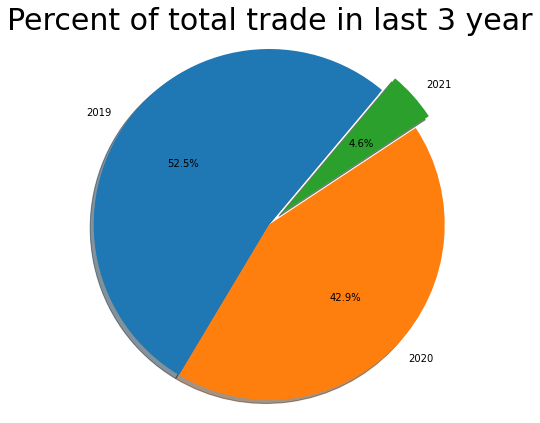

In [18]:
lab= percent.index.values
val= percent['TradeValue'].values
exp= [0,0,0.1]
fig,ax= plt.subplots(figsize=(7,7))
ax.pie(labels= lab, x= val, explode= exp,autopct='%1.1f%%',shadow=True, startangle=50)
ax.axis('equal') 
plt.title('Percent of total trade in last 3 year',fontdict={'fontsize':30})
plt.show()

### Above figure shows total trade but covid 19 start in 2020 in march, so in february and january the trade was working normally.
###  So, By comparing jan and feb of all 3 years, we might get a proper estimation of the effect of covid 19 on trade

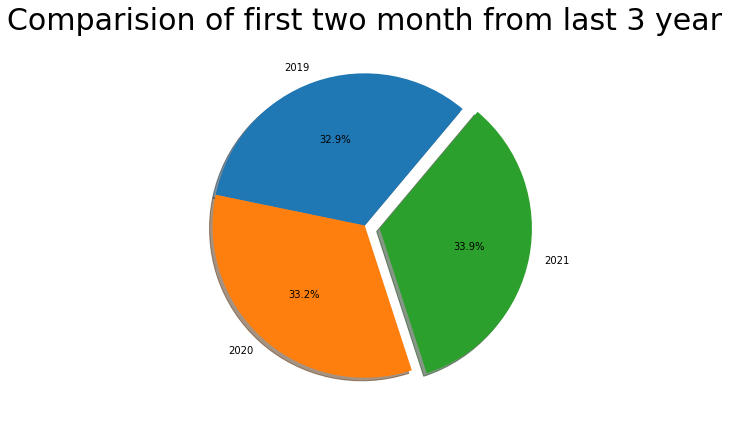

In [19]:
df_m_y= df.groupby('Month').get_group(1).groupby('Year').sum()['TradeValue']
df_plot= (df_m_y/df_m_y.mean()) *100
lab= df_plot.index.values
val= df_plot.values
fig,ax= plt.subplots(figsize=(7,7))
ax.pie(x= val, labels= lab,explode=[0,0,0.1],autopct='%1.1f%%',shadow=True, startangle=50)
plt.title('Comparision of first two month from last 3 year',fontdict={'fontsize':30})
plt.show()

to my surprise, Trade hasn't gone down in jan feb of 2021.
let's see the effect on import and export

In [20]:
# January Import month for last 3 years
df_import_1 =df.groupby('Month').get_group(1).groupby('TransactionType').get_group('Import')
df_import_2 =df.groupby('Month').get_group(2).groupby('TransactionType').get_group('Import')
df_export_1 =df.groupby('Month').get_group(1).groupby('TransactionType').get_group('Export')
df_export_2 =df.groupby('Month').get_group(2).groupby('TransactionType').get_group('Export')

In [23]:
#Import
# jan import
# df_import_1
# feb Import
# df_import_2
import_jf= pd.concat([df_import_1,df_import_2],axis=0)
import_jf

,Country,TradeValue,Year,Month,TransactionType
0,Myanmar,47039674,2019,1,Import
24,Myanmar,21326650,2020,1,Import
49,Myanmar,69036274,2021,1,Import
50,Canada,327375833,2019,1,Import
74,Canada,216462024,2020,1,Import
...,...,...,...,...,...
1900,United Kingdom,497256300,2020,2,Import
1925,USA,2705031094,2019,2,Import
1950,USA,3042873082,2020,2,Import
1975,Venezuela,359365957,2019,2,Import


In [24]:
#export
# jan export
df_export_1
# feb export
df_export_2
export_jf= pd.concat([df_export_1,df_export_2],axis=0)
export_jf

,Country,TradeValue,Year,Month,TransactionType
1,Myanmar,99121436,2019,1,Export
25,Myanmar,76598793,2020,1,Export
48,Myanmar,80785814,2021,1,Export
51,Canada,235748088,2019,1,Export
75,Canada,270195657,2020,1,Export
...,...,...,...,...,...
1899,United Kingdom,798178954,2020,2,Export
1926,USA,4187092413,2019,2,Export
1949,USA,4697616966,2020,2,Export
1976,Venezuela,42202656,2019,2,Export


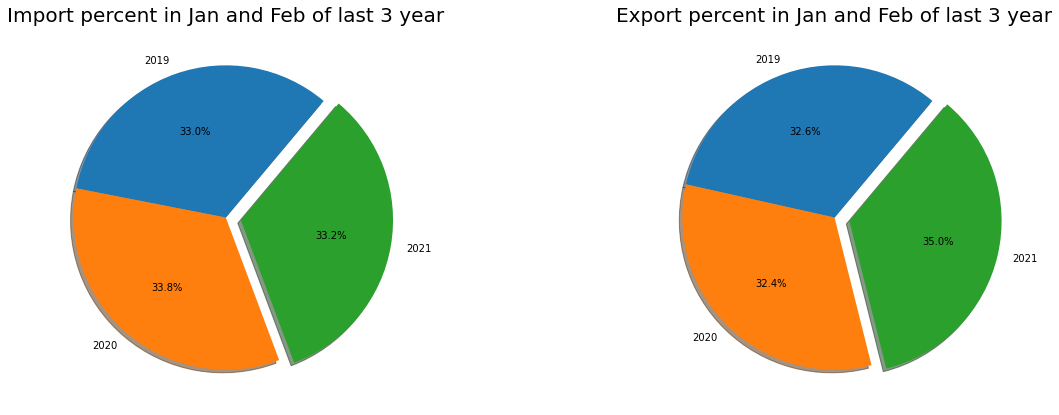

In [25]:
x= import_jf.groupby('Month').get_group(1)[['TradeValue','Year']].groupby('Year').sum()
i1= (x/x.mean())*100
fig,ax= plt.subplots(figsize=(20,7),nrows=1,ncols=2)
ax[0].pie(x= i1['TradeValue'].values, labels= i1.index.values,explode=[0,0,0.1],autopct='%1.1f%%',shadow=True, startangle=50)
ax[0].set_title('Import percent in Jan and Feb of last 3 year',fontdict={'fontsize':20})

j= export_jf.groupby('Month').get_group(1)[['TradeValue','Year']].groupby('Year').sum()
j1= (j/j.mean())*100
ax[1].pie(x= j1['TradeValue'].values, labels= j1.index.values,explode=[0,0,0.1],autopct='%1.1f%%',shadow=True, startangle=50)
ax[1].set_title('Export percent in Jan and Feb of last 3 year',fontdict={'fontsize':20})
plt.show()

## The export of India has been increased by 1 % during covid it might be because of covid vaccine delivery to other nations

In [26]:
#which countries found increase in export during covid?
plt.style.use('fivethirtyeight')
df_2019_Export= df.groupby('Year').get_group(2019).groupby('TransactionType').get_group('Export').groupby('Country').sum()['TradeValue']
df_2019_Import= df.groupby('Year').get_group(2019).groupby('TransactionType').get_group('Import').groupby('Country').sum()['TradeValue']

df_2020_Export= df.groupby('Year').get_group(2020).groupby('TransactionType').get_group('Export').groupby('Country').sum()['TradeValue']
df_2020_Import= df.groupby('Year').get_group(2020).groupby('TransactionType').get_group('Import').groupby('Country').sum()['TradeValue']

df_2021_Export= df.groupby('Year').get_group(2021).groupby('TransactionType').get_group('Export').groupby('Country').sum()['TradeValue']
df_2021_Import= df.groupby('Year').get_group(2021).groupby('TransactionType').get_group('Import').groupby('Country').sum()['TradeValue']

In [18]:
# z=pd.DataFrame(df_2020_Export[country])
# z['2021']= df_2021_Export[country]
# col= z.columns
# z= (z[col]/z[col].mean()) *100
# z

In [27]:
def correct_it(df):
    return (df/df.mean())+1

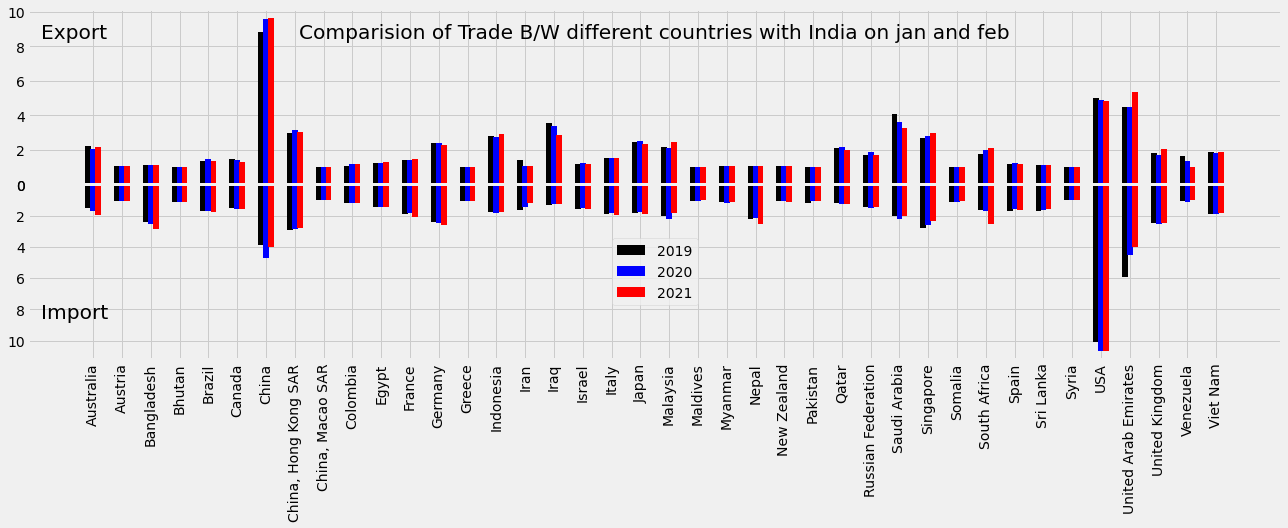

In [30]:
country= df_2019_Export.index
fig,axes= plt.subplots(nrows=2,ncols=1,figsize=(20,6))
gap=4
pad=0.7
x= np.arange(1,len(country)*gap,step=gap)

val= correct_it(df_2019_Export)
axes[1].bar(x= x-pad,height=val,color='black',label='2019')
val= correct_it(df_2019_Import[country])
axes[0].bar(x= x-pad,height=val,color='black')


val= correct_it(df_2020_Export[country])
axes[1].bar(x= x,height=val,color='blue',label='2020')
val= correct_it(df_2020_Import[country])
axes[0].bar(x= x,height=val,color='blue')
val= correct_it(df_2021_Export[country])
axes[1].bar(x= x+pad,height=val,color='red',label='2021')
val= correct_it(df_2021_Import[country])
axes[0].bar(x= x+pad,height=val,color='red')


axes[1].invert_yaxis()
plt.xticks(np.arange(len(country))*gap,rotation=90)
axes[1].set(xticks=x, xticklabels=country,)
axes[0].set(xticks=x, xticklabels=[])
fig.subplots_adjust(hspace=0) #uncomment for middle axis ticks 0.
axes[1].set_title('Import',loc='left',x=0.01,y=0.2)
axes[0].set_title('Export',loc='left',x=0.01,y=0.8)

axes[1].legend(loc='center')
axes[0].set_title('Comparision of Trade B/W different countries with India on jan and feb',x=0.5,y=0.8)
plt.show()

## In the above graph, i just came to realize that their is little bias for the year 2020 and 2019 as, right now the month is april and i have data of month only till march, which means that, 2019 and 2020 will be more than 2021, in order to change this scenario, i ll take month between march 2019 to march 2020 and march 2020 to march 2021. thus it will give us a solid foundation to judge the trade

In [ ]:
#march 19 to march 20
# m_19_20=df[(df['Month']>=3) & (df['Year']==2019) | ((df['Month']<=3) & (df['Year']==2020))]